# 1. Install dependencies

> Add blockquote



In [1]:
# 1. Install dependencies
!pip install tensorflow
!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install pipreqs

#2. Load Dataset

In [2]:
import pandas as pd

# 2. Load Dataset
# Membaca file dataset
data = pd.read_csv('byond_bsi_reviews.csv')

# Menampilkan lima data teratas.
data.head()

# Menampilkan lima data terakhir
data.tail()

# Menampilkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8611 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          8780 non-null   object
 9   repliedAt             8780 non-null   object
 10  appVersion            8611 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


# 2. Pra-pemrosesan Data

In [4]:
import nltk
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# 2. Pra-pemrosesan Data
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Membaca data dari file CSV
try:
    df = pd.read_csv('byond_bsi_reviews.csv')
except FileNotFoundError:
    print("File 'byond_bsi_reviews.csv' tidak ditemukan.")
    exit()

# Memeriksa apakah kolom 'content' ada dalam DataFrame
if 'content' not in df.columns:
    print("Kolom 'content' tidak ditemukan dalam file CSV.")
    exit()

# Pembersihan Data
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

# Membersihkan teks dalam kolom 'content'
df['cleaned_text'] = df['content'].apply(clean_text)

# Tokenisasi, stopwords removal, dan stemming
stop_words = set(stopwords.words('indonesian'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)  # Tokenisasi
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming dan stopwords removal
    return ' '.join(words)  # Menggabungkan kata-kata kembali menjadi teks

# Memproses teks yang telah dibersihkan
df['processed_text'] = df['cleaned_text'].apply(preprocess_text)

# Pelabelan Sentimen: Label sentimen manual
df['sentiment'] = df['content'].apply(lambda x: 1 if 'baik' in x else 0)

# Simpan dataset yang telah diproses
df.to_csv('byond_bsi_reviews_processed.csv', index=False)
print("Processed data has been saved to 'byond_bsi_reviews_processed.csv'")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Processed data has been saved to 'byond_bsi_reviews_processed.csv'


# 3. Pembuatan Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 3. Pembuatan Model
# Pembagian data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment'], test_size=0.2)

# Representasi teks menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model LSTM
model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=1000),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Melatih model
history = model.fit(X_train_tfidf.toarray(), y_train, epochs=5, batch_size=64, validation_data=(X_test_tfidf.toarray(), y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 757s 6s/step - accuracy: 0.8900 - loss: 0.3584 - val_accuracy: 0.9170 - val_loss: 0.2886
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 810s 6s/step - accuracy: 0.9062 - loss: 0.3131 - val_accuracy: 0.9170 - val_loss: 0.2889
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 800s 6s/step - accuracy: 0.8998 - loss: 0.3269 - val_accuracy: 0.9170 - val_loss: 0.2868
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 795s 6s/step - accuracy: 0.9132 - loss: 0.2964 - val_accuracy: 0.9170 - val_loss: 0.2952
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 802s 6s/step - accuracy: 0.9080 - loss: 0.3096 - val_accuracy: 0.9170 - val_loss: 0.2865


# 4. Evaluasi Model

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 4. Evaluasi Model
# Prediksi hasil
y_pred = model.predict(X_test_tfidf.toarray())
y_pred = (y_pred > 0.5).astype(int)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
precision = precision_score(y_test, y_pred) * 100  # Convert to percentage
recall = recall_score(y_test, y_pred) * 100  # Convert to percentage
f1 = f1_score(y_test, y_pred) * 100  # Convert to percentage

print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-Score: {f1:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step
Accuracy: 91.70%
Precision: 0.00%
Recall: 0.00%
F1-Score: 0.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 5. Visualisasi Hasil

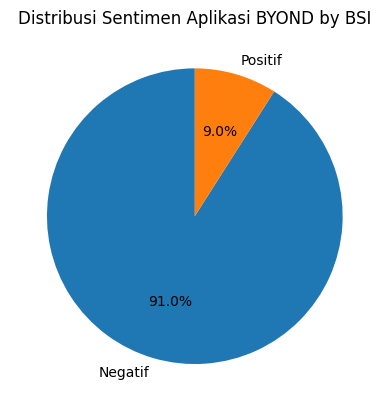

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 5. Visualisasi Hasil
# Visualisasi distribusi sentimen
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Negatif', 'Positif'])
plt.title('Distribusi Sentimen Aplikasi BYOND by BSI')
plt.ylabel('')
plt.show()

# 6. Create requirements file

In [17]:
!pip freeze > requirements.txt

#7. Download file model

In [18]:
import joblib

# Save model
joblib.dump(model, 'sentiment_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Unduh file model
from google.colab import files
files.download('sentiment_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>